# Long Short-Term Memory (LSTM) Using Darts

## What is Darts? 

Darts is a python time series forcasting library. We wanted to see what it can do with its implementation of lstm. How much does it differ from ours? Is it better or worse? what about trainning time? It is generally better to use a library then implement everything by hand. We will be using darts for the upcoming time series forcasting models.

Using darts enables us to test different algorithms faster and to tune parameters faster.

In [1]:
import src.darts__lstm as lstm
import src.framework__test_bench as tb

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 30 minutes.


2022-07-18 19:06:27 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 3172 samples.
C:\Users\Andrew\miniconda3\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
2022-07-18 19:06:27 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-18 19:06:27 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-18 19:06:27 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-18 19:06:27 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-18 19:06:27 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-18 19:06:27 pytorch_lightning.callb

[TEST BENCH] Throwing out data that is less than 15.0 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 61
[TEST BENCH] Making an instance of the class we want to test
[TEST BENCH] Starting training loop


Training: 0it [00:00, ?it/s]

[TEST BENCH] Training took 54.528690338134766 seconds.
[TEST BENCH] Starting testing loop


Predicting: 25it [00:00, ?it/s]

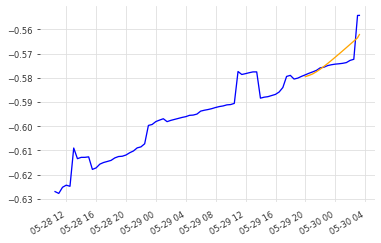

Predicting: 25it [00:00, ?it/s]

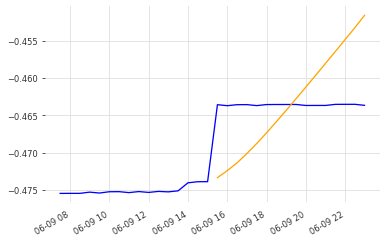

Predicting: 25it [00:00, ?it/s]

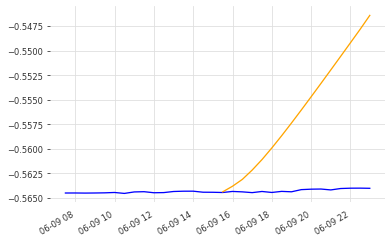

Predicting: 25it [00:00, ?it/s]

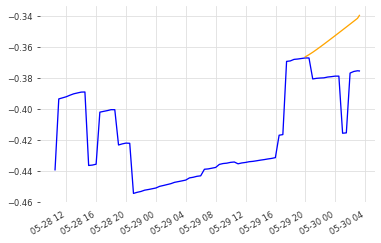

Predicting: 25it [00:00, ?it/s]

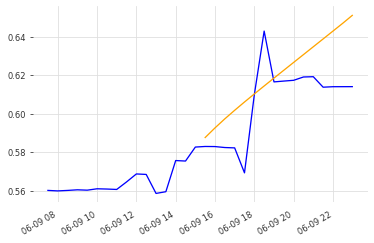

Predicting: 25it [00:00, ?it/s]

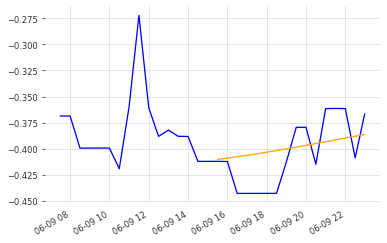

Predicting: 25it [00:00, ?it/s]

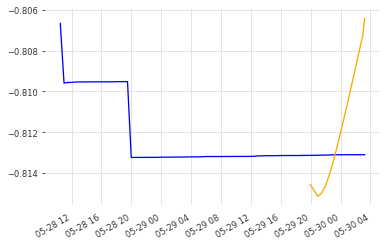

Predicting: 25it [00:00, ?it/s]

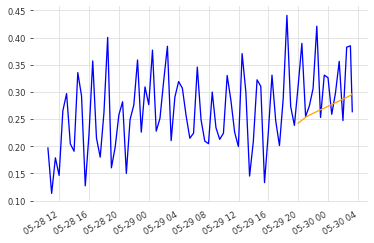

Predicting: 25it [00:00, ?it/s]

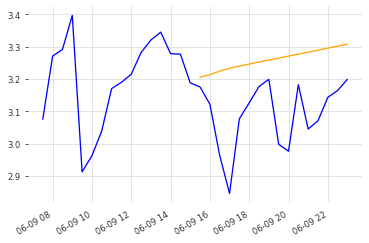

Predicting: 25it [00:00, ?it/s]

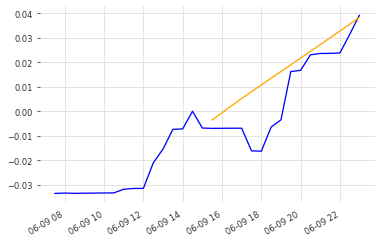

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

Predicting: 25it [00:00, ?it/s]

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             54.528690338134766
[TEST BENCH] Average mse over the test set is        0.004830125804951592
[TEST BENCH] Average precision over the test set is  0.6905782741848318
[TEST BENCH] Average recall over the test set is     0.9908067797412059
[TEST BENCH] Average F1 over the test set is         0.8049741850058902
[TEST BENCH] Average MASE over the test set is       53.83973060669945
[TEST BENCH] Average MAPE over the test set is       12.0217175807982
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] | metric | app | training time | mse | precision | recall | F1 | MASE | MAPE |
[TEST BENCH] | node_mem | moc/smaug | 55 seconds   | 0.00483 | 0.69058 | 0.99081 | 0.804

In [2]:
tb = tb.TestBench(
    class_to_test=lstm.DartsLSTMTester,
    path_to_data="./data/",
)
tb.run_training_and_tests()